# __Part B: Recurrent Neural Network__

<a class="anchor" id="1"></a>
## <font color='#71a1e3'> __Problem Statement__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">


Build a next-word predictor, given a sequence of words.

The input to your model is a sequence of words of any length (could be one word,
could be five words, etc.).

The output of your model is a word that follows that sequence of words.
In principle, given an input to your model, you can ask your model to predict the next
ten words, by asking your model to predict the next word ten times.

To test your model, you must apply the following ten example sequences of words as
inputs:

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Import Libraries__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to import all the necessary libraries

In [95]:
!pip install --upgrade pip 

!pip install --upgrade Pillow

  Using cached pip-23.3.1-py3-none-any.whl.metadata (3.5 kB)
Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\ruizh\anaconda3\envs\gpu_env\python.exe -m pip install --upgrade pip


In [96]:
!pip install keras-tuner tensorflow_addons textstat bert_score rouge sentence_transformers seaborn spacy wordcloud

### Other Import

In [97]:
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.2/587.7 MB 2.4 MB/s eta 0:04:09
     ---------------------------------------- 0.7/587.7 MB 4.8 MB/s eta 0:02:03
     ---------------------------------------- 1.1/587.7 MB 6.6 MB/s eta 0:01:29
     ---------------------------------------- 1.4/587.7 MB 6.0 MB/s eta 0:01:38
     ---------------------------------------- 1.6/587.7 MB 6.2 MB/s eta 0:01:35
     ---------------------------------------- 1.6/587.7 MB 5.7 MB/s eta 0:01:43
     ---------------------------------------- 1.6/587.7 MB 5.7 MB/s eta 0:01:43
     ---------------------------------------- 1.7/587.7 MB 4.2 MB/s eta 0:02:19
     ---------------------------------------- 1.8/587.7 MB 4.0 MB/s eta 0:02:25
     ---------------------------------------- 2.1/587.7 MB 4.1 MB/s eta 0:02:22
     ---------------------------------------- 2.7/587.

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.2/12.8 MB 2.6 MB/s eta 0:00:05
     - -------------------------------------- 0.5/12.8 MB 4.2 MB/s eta 0:00:03
     --- ------------------------------------ 1.0/12.8 MB 5.7 MB/s eta 0:00:03
     ---- ----------------------------------- 1.4/12.8 MB 6.3 MB/s eta 0:00:02
     ----- ---------------------------------- 1.8/12.8 MB 6.5 MB/s eta 0:00:02
     ------- -------------------------------- 2.3/12.8 MB 7.4 MB/s eta 0:00:02
     -------- ------------------------------- 2.7/12.8 MB 7.1 MB/s eta 0:00:02
     --------- ------------------------------ 3.2/12.8 MB 7.5 MB/s eta 0:00:02
     ----------- ---------------------------- 3.6/12.8 MB 7.6 MB/s eta 0:00:02
     ------------ --------------------------- 4.0/12.8 MB 7.8 MB/s eta 0:00:02
     ------------- -------------------------- 4.4/12.8 MB 7.9 MB/s

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import math
import nltk
import spacy
import random
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nlp = spacy.load('en_core_web_sm')

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from collections import Counter
from rouge import Rouge 
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from bert_score import score
import textstat
import random
import warnings
from nltk import FreqDist
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ruizh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ruizh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruizh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ruizh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ruizh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ruizh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_d

### Tensorflow Import

In [99]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.translate.bleu_score import sentence_bleu
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.utils import Sequence, to_categorical
from tensorflow import expand_dims
from tensorflow.keras import Sequential
from tensorflow.keras import layers as L
from tensorflow.keras import backend as K
from tensorflow.image import random_flip_left_right, random_crop, resize_with_crop_or_pad
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import (Dense, Input, InputLayer, Normalization, Flatten,BatchNormalization,
    Dropout,Conv2D, GlobalAveragePooling2D, MaxPooling2D, ReLU, Layer,Activation, Multiply, AveragePooling2D,
    Add, RandomRotation,Resizing, Rescaling, Reshape, Concatenate, concatenate, Lambda,LeakyReLU, ZeroPadding2D)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, TerminateOnNaN, TensorBoard, CSVLogger, Callback
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import RMSprop, SGD, Adam, Adagrad, Adamax
from tensorflow.keras.regularizers import l2, L2
from tensorflow.keras.optimizers.schedules import *
from tensorflow.keras.metrics import FalseNegatives, categorical_crossentropy, sparse_categorical_crossentropy
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.image import *
from tensorflow_addons.optimizers import SWA
from kerastuner.tuners import Hyperband
from kerastuner import RandomSearch
from kerastuner import HyperModel

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Import Dataset__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to import the data

In [100]:
df=pd.read_csv('train.csv')
print("Shape of data=>",df.shape)

Shape of data=> (1000, 1)


<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Data Understanding__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to do the the basic understanding of dataset

### **Get the basic info of the dataset**

This gives us an idea of what the dataset is all about

In [101]:
basic_stats = df['Quotes'].describe()
basic_stats

count                                                  1000
unique                                                  890
top       Radiate acceptance, and find peace in embracin...
freq                                                      5
Name: Quotes, dtype: object

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From the basic stats above, we can see that the dataset has length of quotes between 7 and 35
</div>

In [102]:
df['tokens'] = df['Quotes'].str.split()
df['token_count'] = df['tokens'].apply(len)
print("Total documents:", df.shape[0])
print("Mean word count:", df['token_count'].mean())
print("Vocabulary size:", len(set(df['Quotes'].str.cat(sep=' ').split())))

Total documents: 1000
Mean word count: 11.865
Vocabulary size: 1592


<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From the above, we can see that the total count is 1000
- Mean word count is 11.865
- Vocab size with 1574
</div>

### Checking for Null Values

In [103]:
df.isnull().sum()

Quotes         0
tokens         0
token_count    0
dtype: int64

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above we can see that their is no null values in this dataset
</div>

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Exploratory Data Analysis__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to do the Exploratory Data Analysis

### Distribution Analysis
This is to visualsie the distribution of the word of quotes in the dataset
- Tells us about the skewness of the data

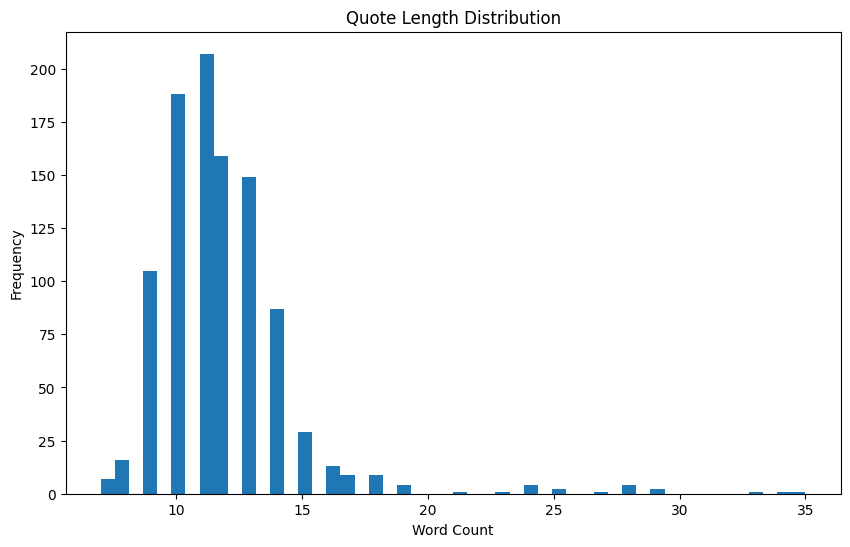

In [104]:
plt.figure(figsize=(10, 6))
plt.hist(df['token_count'], bins=50)
plt.title('Quote Length Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

### Other Distribution
- Here we will analysis on the unique world count and the average word length distribution

In [105]:
df['word_count'] = df['Quotes'].apply(lambda x: len(x.split()))
df['unique_word_count'] = df['Quotes'].apply(lambda x: len(set(x.split())))
df['avg_word_length'] = df['Quotes'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

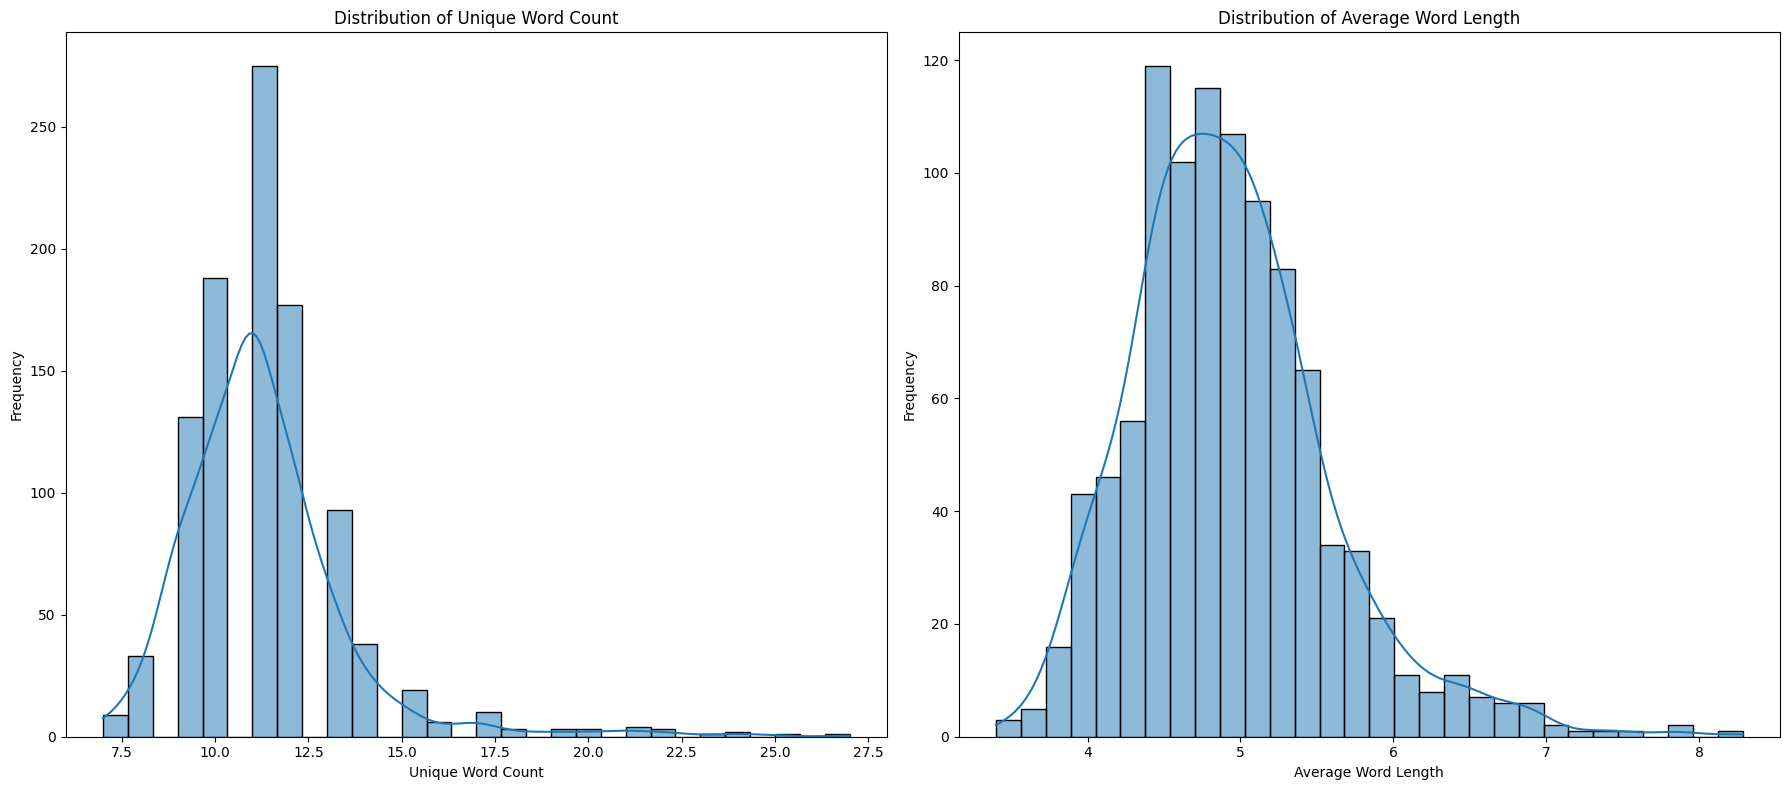

In [106]:
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
sns.histplot(df['unique_word_count'], bins=30, kde=True)
plt.title('Distribution of Unique Word Count')
plt.xlabel('Unique Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['avg_word_length'], bins=30, kde=True)
plt.title('Distribution of Average Word Length')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- We can see that all the three word count, unique word count and average word length are all positively skewed
</div>

### Word Cloud

- This shows which all the words in the dataset
- Those words that appear bigger in size have greater occurence

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruizh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


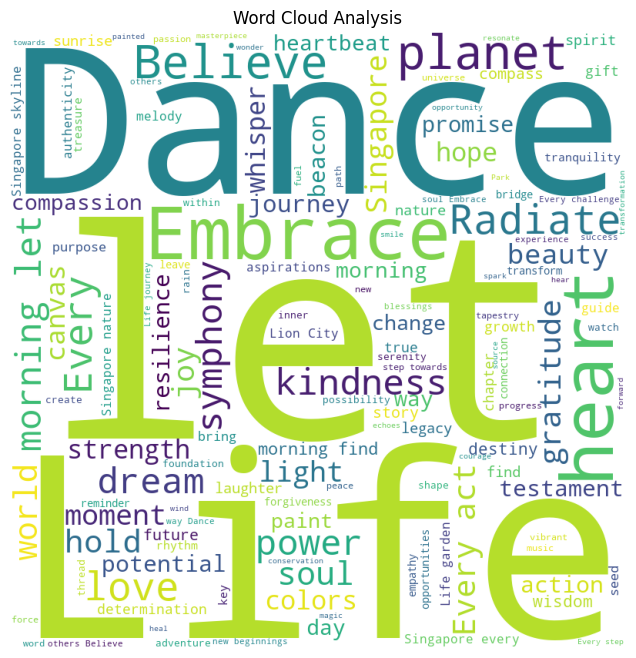

In [107]:
nltk.download('stopwords')

# Generate the word cloud with default settings
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=set(stopwords.words('english')),
                      min_font_size=10).generate(' '.join(df['Quotes']))

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.title('Word Cloud Analysis')
plt.imshow(wordcloud)
plt.axis("off")  # Turn off the axis
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that words like Let life, dance appear pretty commonly

### Word Character Distribution

- Analyse on the distribution of word character in the dataset

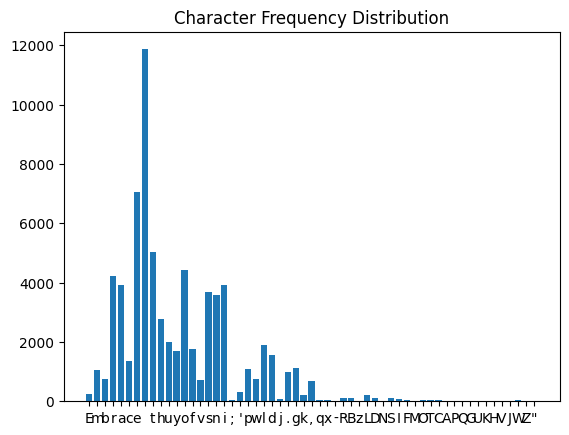

In [108]:
full_text = " ".join(df['Quotes'])

char_freq = Counter(full_text)
plt.bar(char_freq.keys(), char_freq.values())
plt.title('Character Frequency Distribution')
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that words are distributed with most at the character e

### Bi-gram Analysis

- Analysis on a pair of consecutive words
- Words that appear more common together

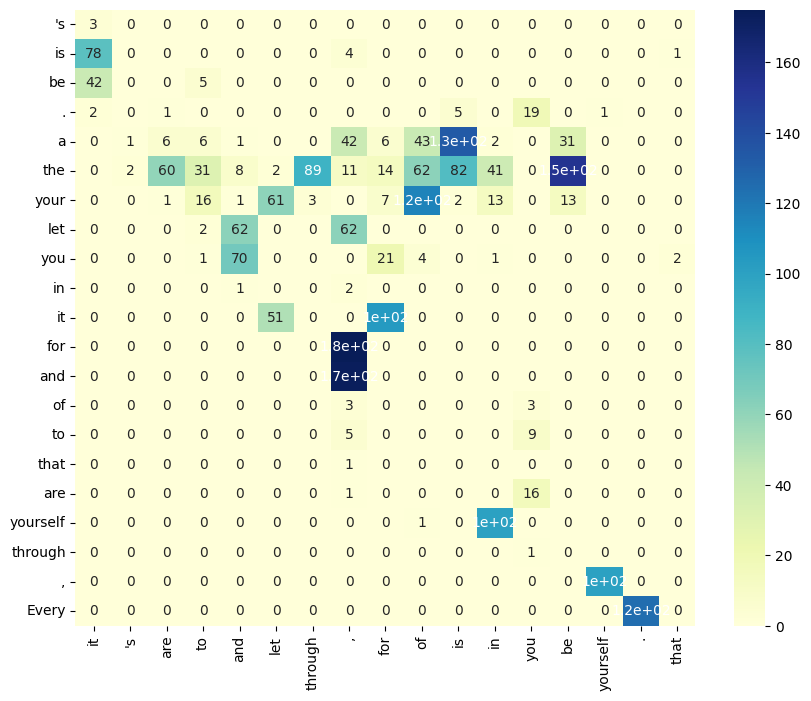

In [109]:
tokens = word_tokenize(full_text)
bi_grams = list(nltk.bigrams(tokens))
fdist = FreqDist(tokens)
common_words = set(word for word, freq in fdist.items() if freq > 100)
filtered_bi_grams = [(w1, w2) for w1, w2 in bi_grams if w1 in common_words and w2 in common_words]
co_occurrence_matrix = pd.DataFrame(nltk.ConditionalFreqDist(filtered_bi_grams)).fillna(0).astype(int)
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, annot=True, cmap="YlGnBu")
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can that worlds like for and , occurs the most frequently in the dataset

### Top 5 Most Frequent Words

- This will tells us the most frequent words appearing in the dataset

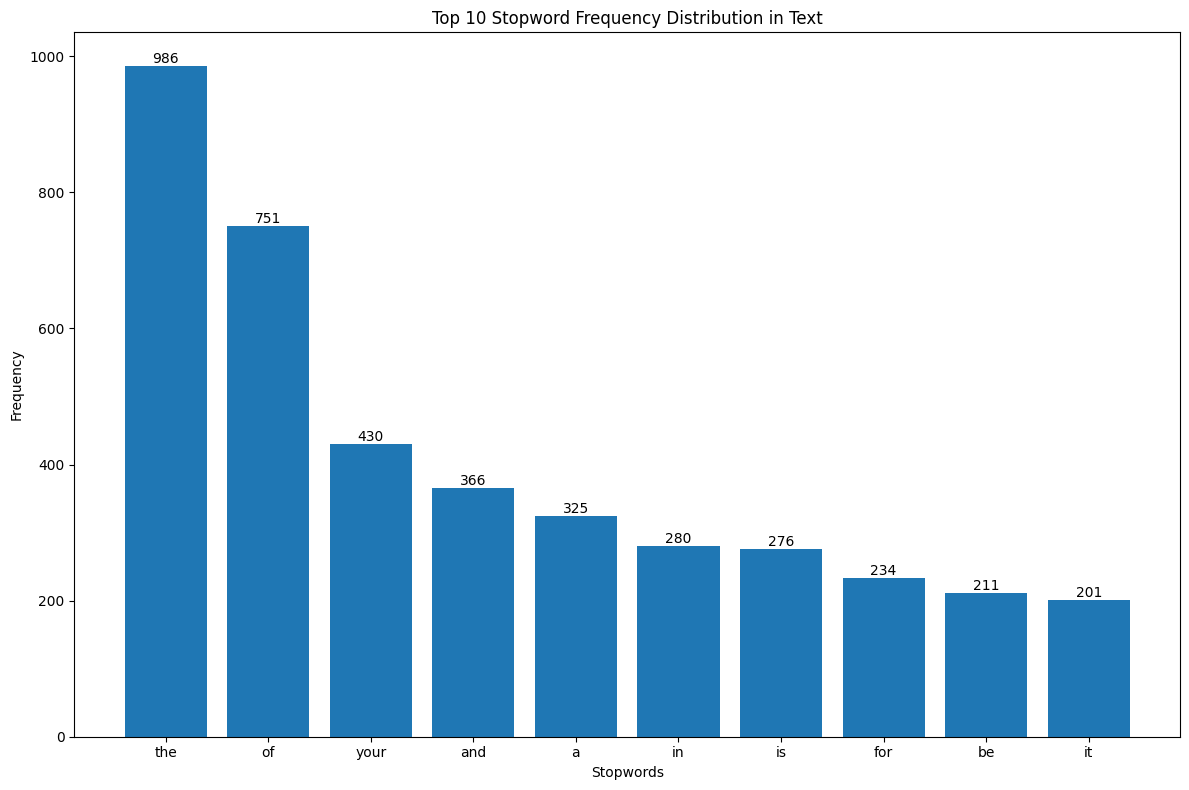

In [110]:
stopwords_text = nltk.corpus.stopwords.words('english')
stopwords_set = set(stopwords_text)
stopword_freq = dict(sorted(Counter(w.lower() for w in word_tokenize(full_text) if w.lower() in stopwords_set).items(), key=lambda x: x[1], reverse=True)[:10])

# Plotting the graph
plt.figure(figsize=(12, 8), facecolor=None)
bars = plt.bar(stopword_freq.keys(), stopword_freq.values())

# Annotating each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.xlabel('Stopwords')
plt.ylabel('Frequency')
plt.title('Top 10 Stopword Frequency Distribution in Text')
plt.tight_layout()
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, the, of your and that are all words that are short and are adjective mostly

### Lexical Richess Analysis
Measuring lexical richness is generally concerned with how many different words are used in a text (spoken or written).

In [111]:
def lexical_richness(text):
    words = text.split()
    return len(set(words)) / len(words) if words else 0

df['lexical_richness'] = df['Quotes'].apply(lexical_richness)
print(df['lexical_richness'].describe())

count    1000.000000
mean        0.957596
std         0.061991
min         0.657143
25%         0.916667
50%         1.000000
75%         1.000000
max         1.000000
Name: lexical_richness, dtype: float64


<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, the dataset has a pretty high mean lexcial richness score

### Flesch Reading Ease

It then calculates the average number of words per sentence and the average number of syllables per word, and basically tells us how easy it is to read the text

In [112]:
flesch_reading_score = textstat.flesch_reading_ease(df['Quotes'][0])
print(flesch_reading_score)

80.62


<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, the dataset is suitable for 6th grader to read with a score of 80.62

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Data Preprocessing (1)__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to do data preprocessing part 1

### Clearning the commas and capilalisation

- Dataset contains some form of commas and upper case letters, here it is to preprocess the data

In [113]:
df['clean_text'] = df['Quotes'].str.lower().str.replace(r'[^\w\s]+', '')
df['clean_text']

0      embrace the beauty of every sunrise; it's a fr...
1      embrace challenges; they are the stepping ston...
2      embrace the rhythm of life and let it dance th...
3      embrace kindness, for it has the power to chan...
4      embrace the journey, for it leads to the desti...
                             ...                        
995    with an open heart, welcome the opportunities ...
996    this morning, let your laughter be the music t...
997    in the serenity of this morning, find the powe...
998    this morning, let your actions be a testament ...
999    with each sunrise, this morning offers the pro...
Name: clean_text, Length: 1000, dtype: object

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, the dataset has been preprocess correctly 

### Convert sequences to sequence of numbers

- This is so that we are able to have an input and label for x and y for model training
- Here we will have input sequences from 2 to the length of the quotes

In [114]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Quotes'])
total_words = len(tokenizer.word_index) + 1
tokenizer

In [115]:
input_sequences = []
for line in df['Quotes']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
len(input_sequences)

10886

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that the shape of the list is 10886

<a class="anchor" id="2"></a>
## <font color='#71a1e3'>__Feature Engineering__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here we will feature engineer the dataset

### Padding of sequences

- The padding of sequences ensures that all are of the same length 
- Provide consistent shape and size
- This is so that we can batched the dataset as sequences with different length is unable to do so

In [116]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences.shape

(10886, 35)

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Data Preprocessing (2)__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to do data preprocessing part 2

### Splitting dataset into inputs, labels

This is where we create the x and y variable for input into model fitting later

In [117]:
x, y = input_sequences[:,:-1],input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<a class="anchor" id="2"></a>
## <font color='#71a1e3'>__Required Functions__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here we will define the required function

### Loss and Accuracy Curve

1. Loss Curve:
   - Calculates the actual difference between the model's prediction and the actual true output
   - By minimising the loss, the model aims to make its predictions as close as possible to the true value
   - Shows us the loss over iterations
   - ![Loss Curve](https://api.wandb.ai/files/mostafaibrahim17/images/projects/37042936/4cdebc09.png)
3. Accuracy Curve:
   - This us how good the model is at making correct predictions on the training data as it goes through the training process.
   - It is measured in percentages and tells us the proportion of instances the model correctly classified out of the total number of instances
   - Tells us how well the model fit with the data
   - ![Accuracy Curve](https://api.wandb.ai/files/mostafaibrahim17/images/projects/37042936/4cdebc09.png)

In [118]:
def plot_model_history(model_history):
    history_df = pd.DataFrame(model_history)
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    axs[0].plot(history_df['loss'], 'g--', label='Training Loss')
    axs[0].set_title('Training Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].grid(True)

    if 'accuracy' in history_df :
        axs[1].plot(history_df['accuracy'], 'g--', label='Training Accuracy')
        axs[1].set_title('Training Accuracy')
        axs[1].set_xlabel('Epochs')
        axs[1].set_ylabel('Accuracy')
        axs[1].legend()
        axs[1].grid(True)

    plt.tight_layout()
    plt.close(fig)

    def show():
        display(fig)

    return show

### Predict Next 10 Words function

- Here it is to add the function that can predict the next 10 words
- This is so that we can fit into the model training and evalute on the result

In [119]:
def predict_next_word(model, seed_text, num_to_predict=10, temperature=0.5):
    for _ in range(num_to_predict):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        
        predicted_probs = model.predict(token_list, verbose=0)[0]
        preds = np.asarray(predicted_probs).astype('float64')
        preds = np.log(preds + 1e-8) / temperature  
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        probabilities = np.random.multinomial(1, preds, 1)
        predicted_index = np.argmax(probabilities)
        output_word = tokenizer.index_word[predicted_index]
        seed_text += " " + output_word
    return seed_text


### Setting the SEED text

- Here are the text that are being tested on

In [120]:
seed_texts = ['embrace each day',
'radiate some',
'believe that',
"life's actual purpose is",
'dance through each and every',
'let your time and energy',
'every person is',
'our country Singapore is',
'planet earth is',
'morning and evening would make it']



### Setting the paramters

In [121]:
LR = 0.01
MOMENTUM = 0.9
WEIGHT_DECAY = 0.0005
val_split = 0.2
max_epochs = 100


In [122]:
base_hparams = {"val_split" : val_split, "max_epochs" : max_epochs,"batch_size" : 128}

### Custom Callback
- Since accuracy and loss may not be the best metric to follow, let us create a custom callback with other evaluation metrics

In [123]:
class CustomMetric(tf.keras.callbacks.Callback):
    def __init__(self, seed_texts, target_texts, model, tokenizer, max_len):
        self.seed_texts = seed_texts
        self.target_texts = target_texts
        self.model = model
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

    def on_epoch_end(self, epoch, logs=None):
        generated_texts = [self.predict_next_word(seed_text) for seed_text in self.seed_texts]
        cosine_scores = self.calculate_cosine_similarity(self.seed_texts, generated_texts)
        # Add other metrics calculation here
        print(f'\nEpoch {epoch + 1} - Mean Cosine Similarity: {np.mean(cosine_scores)}')
        
    def predict_next_word(self, seed_text, num_to_predict=10, temperature=1):
        for _ in range(num_to_predict):
            token_list = self.tokenizer.texts_to_sequences([seed_text])[0]
            token_list = pad_sequences([token_list], maxlen=self.max_len - 1, padding='pre')

            predicted_probs = self.model.predict(token_list, verbose=0)[0]
            preds = np.asarray(predicted_probs).astype('float64')
            preds = np.log(preds + 1e-8) / temperature  
            exp_preds = np.exp(preds)
            preds = exp_preds / np.sum(exp_preds)
            probabilities = np.random.multinomial(1, preds, 1)
            predicted_index = np.argmax(probabilities)
            output_word = self.tokenizer.index_word.get(predicted_index, '')
            seed_text += " " + output_word
        return seed_text
    
    def calculate_cosine_similarity(self, seed_texts, generated_texts):
        cosine_scores = []
        for seed, gen in zip(seed_texts, generated_texts):
            seed_emb = self.embedding_model.encode(seed)
            gen_emb = self.embedding_model.encode(gen)
            score = cosine_similarity([seed_emb], [gen_emb])[0][0]
            cosine_scores.append(score)
        return cosine_scores



### Evluator

- Evaluator class will handle the data and history 
- Training of model
- Return history and defined callbacks

In [124]:
class Evaluator:
  def __init__(self, path=None, project_name="CNN_CA1"):
      # Initialize wandb
      self.project_name = project_name

      # Your existing initialization code
      if path:
          self.result = pd.read_csv(path, sep=';')
      else:
          cols = ['Model Name', 'Batch Size', "Train Loss",  "Train Acc",'BLEU-Score','Rouge-Score','Bert Score',"Remarks"]
          self.result = pd.DataFrame(columns=cols)

      self.callback = [
          TerminateOnNaN()
      ]

  def train_model(self, model,data, val, hyperparameters, callbacks):
    tf.keras.backend.clear_session()
    epochs = hyperparameters['max_epochs']
    batch_size = 64

    if val is None:
      return model.fit(data, epochs=epochs, batch_size=128, callbacks=callbacks).history
    else:
      return model.fit(data, epochs = epochs, batch_size = batch_size , callbacks=callbacks).history

  def model_evaluate(self, data,  model, hyperparameters,val=None, callbacks=None, plot_loss=True, remarks=""):
      tf.keras.backend.clear_session()
      callbacks = (callbacks or [EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True), ReduceLROnPlateau(patience=5)]) + self.callback
      history = self.train_model(model,data, val, hyperparameters, callbacks)
      bestval_index = np.argmax(history['accuracy'])
      if plot_loss:
          try:
              fig = plot_model_history(history)
          except Exception as e:
              print(e, 'here')
              print("error creating loss curve")
              fig = None
      scores_bleau = 0
      scores_rouge = 0
      scores_cre = 0
      score_l = 0
      score_similarity = 0
      for texts in seed_texts:
          next_words = 10  
          predicted_text = predict_next_word(model, texts, next_words)
          print(predicted_text)

          scores_bleau += sentence_bleu([word_tokenize(texts)], word_tokenize(predicted_text))
          print(scores_bleau)
          rouge = Rouge()
          scores_dicts_rouge  = rouge.get_scores(texts, predicted_text)
          scores_rouge += rouge.get_scores(texts, predicted_text)[0]['rouge-l']['f']
          scores_cre += creativity_index(texts, predicted_text)
          score_l += lexical_diversity(predicted_text)
          generated_embedding = semantic_model.encode(predicted_text)
          seed_embedding = semantic_model.encode(texts)
          score_similarity += cosine_similarity([generated_embedding], [seed_embedding])[0][0]

      result = {
          "Model Name": model.name,
          "Epochs": len(history["loss"]),
          "Batch Size": hyperparameters["batch_size"],
          "Train Loss": history["loss"][bestval_index],
          "Train Acc": history["accuracy"][bestval_index],
          'BLEU-Score': scores_bleau/10,
          'Rouge-Score':scores_rouge/10,
          'Creativity Index': scores_cre/10,
          'Lexical Diversity': score_l/10,
          'Cosine Similarity': score_similarity/10
      }
      return result, fig

  def _train_model(self, model, training_data, validation_data, hyperparameters, callbacks):
      tf.keras.backend.clear_session()
      epochs = hyperparameters["max_epochs"]
      batch_size = hyperparameters["batch_size"]

      if validation_data is None:
          X_train, y_train = training_data
            
          return model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=hyperparameters["val_split"], callbacks=callbacks).history

      return model.fit(training_data, validation_data=validation_data, epochs=epochs, batch_size=batch_size, callbacks=callbacks).history


  def return_history(self, project_name='CNN_CA1', entity=None, include_cols=None):
      if include_cols is None:
          include_cols = ['Model Name', 'Epochs', 'Batch Size', 'Train Loss','Test Loss','Train Acc','Test Acc','Remarks']

      runs = self.api.runs('111da/CNN_CA1')
      # List to store results
      results = []

      for run in runs:
          run_summary = run.summary
          data = {}
          for col in include_cols:
              data[col] = run_summary.get(col, None)
          results.append(data)
      df = pd.DataFrame(results)

      return df


<a class="anchor" id="2"></a>
## <font color='#71a1e3'>__Possible Evaluation Metrics__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Below are the evaluation metrics that I am going to be using

### BLEU Score

- Evaluating the quality of text which has been machine translated
- Quantifies how similar the machine translation to a set of high quality human translations
- Does not account for meaning or content of sentences
- Purely measures the overlap of phrases
- Does not directly measure the fluency of the generated text
- Not very suitable in this case but we will just use as a side reference

### Rouge ( Recall-Oriented Understudy for Gisting Evaluation)

- It compares an automatically produced summary or translation against a reference or a set of references (human-produced) summary or translation
-  Measures the number of matching ‘n-grams’ between our model-generated text and a ‘reference

Example:
![Bert Score Architechture](https://miro.medium.com/v2/resize:fit:1400/1*8Du8ThhWqVFAX7YK6zSFyw.png)

### Creativity Index (Focus)

- This is a custom index created such that it takes in what are the unique amount of words generated and compare with the seed text
- The higher it is the more creative it is


In [125]:
def creativity_index(seed_text, generated_text):
    seed_words = set(seed_text.split())
    generated_words = set(generated_text.split())
    unique_generated_words = generated_words - seed_words
    return len(unique_generated_words) / len(generated_words)


### Lexical Diversity (Focus)

- Ratio of different unique words sterms to the total number of words
- This test for the creativity of the texts generated

In [126]:
def lexical_diversity(text):
    tokens = word_tokenize(text)
    return len(set(tokens)) / len(tokens)

###  Semantic Similarity Measures

- To measure the distance between the semantic meanings of a pair of words, phrases, sentences, or document
- Considers the meaning and words of the text produces instead of seeing how exact matches

In [127]:
semantic_model = SentenceTransformer('all-MiniLM-L6-v2')

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Baseline Model__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to do data preprocessing

In [128]:
import tensorflow as tf

def sequence_generator(predictors, labels, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((predictors, labels))
    return dataset

# Usage
batch_size = 128
dataset = sequence_generator(x, y, batch_size)
dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(34,), dtype=tf.int32, name=None), TensorSpec(shape=(1199,), dtype=tf.float32, name=None))>

### Making the results dataframe

In [129]:
columns = ["Model Name", "Epochs", "Batch Size", "Train Loss", "Test Loss", "Train Acc", "Test Acc",'Kappa', "Comments"]
overall = pd.DataFrame(columns=columns)
print(overall)


Empty DataFrame
Columns: [Model Name, Epochs, Batch Size, Train Loss, Test Loss, Train Acc, Test Acc, Kappa, Comments]
Index: []


### Define the evluator

In [130]:
evaluator = Evaluator()
evaluator

### Baseline Dense Model

**Input Type**
- **Configuration**: Length of text

**Flatten**
- **Purpose**: Flattens the 2D input image into a 1D array

**First, Second Dense Block**
- **Layer Type**: Dense with neurons 512 with activation ReLU

**Output Block:**

- **Layer Type**: Dense with (total words) neurons and activation ReLU

**Compilation**
- Optimizer: 'adam'.
- Loss Function: Categorical Crossentropy.
- Metrics: Accuracy

In [131]:
def baseline_model(input_length):
    model = Sequential()
    model.add(Flatten(input_shape = (input_length,)))
    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(units=total_words, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [132]:
baseline_model = baseline_model(max_sequence_len-1)
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 34)                0         
                                                                 
 dense (Dense)               (None, 512)               17920     
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1199)              615087    
                                                                 
Total params: 895,663
Trainable params: 895,663
Non-trainable params: 0
_________________________________________________________________


#### Running the model

In [133]:
results_base, fig_base = evaluator.model_evaluate( dataset, baseline_model, base_hparams)

Epoch 1/100


ValueError: in user code:

    File "c:\Users\ruizh\anaconda3\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\ruizh\anaconda3\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ruizh\anaconda3\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\ruizh\anaconda3\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\ruizh\anaconda3\envs\gpu_env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\ruizh\anaconda3\envs\gpu_env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 34, but received input with shape (34, 1)
    
    Call arguments received by layer "sequential" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(34,), dtype=int32)
      • training=True
      • mask=None


#### Analyse the Graph

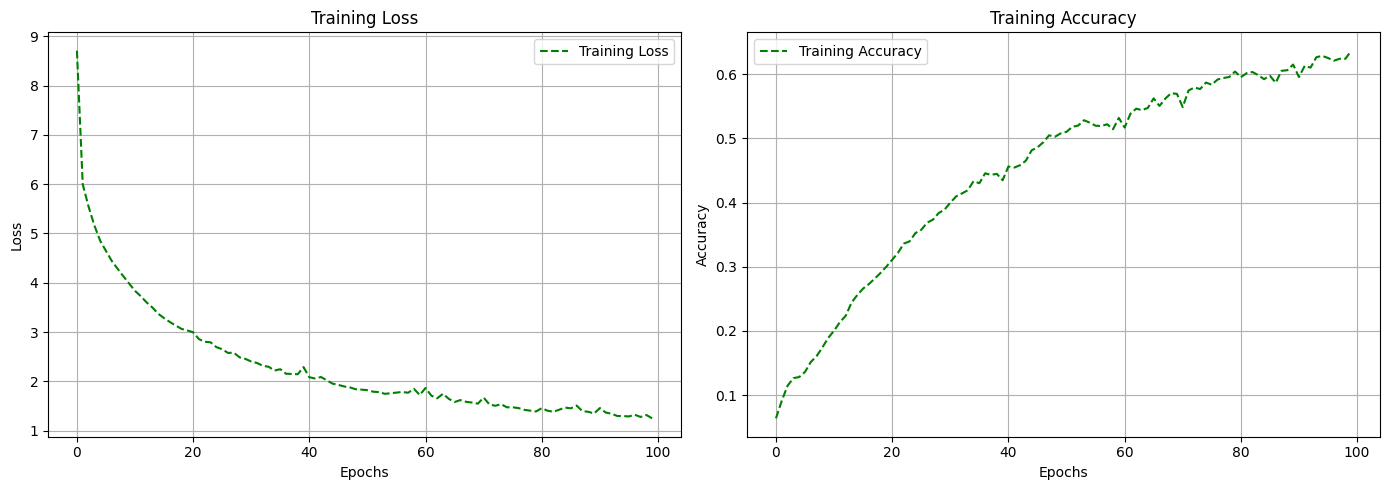

In [ ]:
fig_base()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Training loss
    - For the training loss, it starts relatively  and drops steadily
- Training accuracy
    - For the training accuracy, it increases steadily before reaching a train accuacy of 60+ percent
</div>

#### Analysing the results

In [ ]:
pd.Series(results_base)

Model Name           sequential
Epochs                      100
Batch Size                  128
Train Loss             1.249965
Train Acc              0.636597
BLEU-Score             0.118051
Rouge-Score            0.434732
Creativity Index       0.716905
Lexical Diversity      0.931509
Cosine Similarity      0.541497
dtype: object

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- From above, we can see that while train accuracy is not our main focus, it did not achieve a high score
- Bleau score of 12% is relatively low and this means that the generated text has limited similarity to reference translation
</div>

### LSTM Model

- A recurrent neural network (RNN) architecture widely used in Deep Learning
- Excels at capturing long-term dependencies, making it ideal for sequence prediction tasks
- It contains three different gates, the input gate, the forget gate and the output gate
![LSTM](https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2021-03-16-13-41-03.png) 

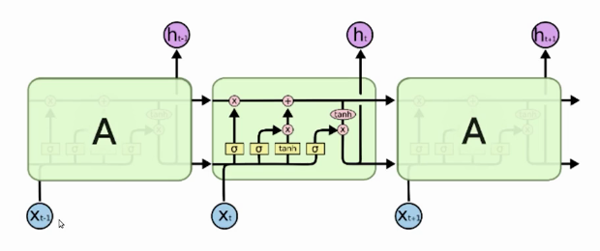!


**Input Type**
- **Configuration**: Length of text

**Embedding**
- **Purpose**: Embedding is a string of numbers that serves as a unique identifier

**LSTM Layers**
- **Layer Type**: LSTM ues 150 neurons

**Output Block:**

- **Layer Type**: Dense with (total words) neurons and activation ReLU

**Compilation**
- Optimizer: 'adam'.
- Loss Function: Categorical Crossentropy.
- Metrics: Accuracy

In [ ]:
def lstm_model(input_length):
    model = Sequential()
    model.add(Embedding(total_words, 240, input_shape = (input_length,)))
    model.add(LSTM(150, return_sequences=True))
    model.add(LSTM(100))
    model.add(Dense(total_words, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


#### Running the model

In [ ]:
lstm_model = lstm_model(max_sequence_len-1)
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 240)           287760    
                                                                 
 lstm (LSTM)                 (None, 34, 150)           234600    
                                                                 
 lstm_1 (LSTM)               (None, 100)               100400    
                                                                 
 dense (Dense)               (None, 1199)              121099    
                                                                 
Total params: 743,859
Trainable params: 743,859
Non-trainable params: 0
_________________________________________________________________


In [ ]:
results_lstm, fig_lstm = evaluator.model_evaluate( x, y , lstm_model, base_hparams)

Epoch 1/100
86/86 [==============================] - 5s 13ms/step - loss: 5.7338 - accuracy: 0.0870 - lr: 0.0010
Epoch 2/100
86/86 [==============================] - 1s 12ms/step - loss: 5.3578 - accuracy: 0.0888 - lr: 0.0010
Epoch 3/100
86/86 [==============================] - 1s 12ms/step - loss: 5.3453 - accuracy: 0.0862 - lr: 0.0010
Epoch 4/100
86/86 [==============================] - 1s 12ms/step - loss: 5.1225 - accuracy: 0.0965 - lr: 0.0010
Epoch 5/100
86/86 [==============================] - 1s 13ms/step - loss: 4.8928 - accuracy: 0.1442 - lr: 0.0010
Epoch 6/100
86/86 [==============================] - 1s 13ms/step - loss: 4.6965 - accuracy: 0.1580 - lr: 0.0010
Epoch 7/100
86/86 [==============================] - 1s 12ms/step - loss: 4.5225 - accuracy: 0.1791 - lr: 0.0010
Epoch 8/100
86/86 [==============================] - 1s 12ms/step - loss: 4.3574 - accuracy: 0.2026 - lr: 0.0010
Epoch 9/100
86/86 [==============================] - 1s 12ms/step - loss: 4.2058 - accuracy: 0.2

#### Analyse the Graph

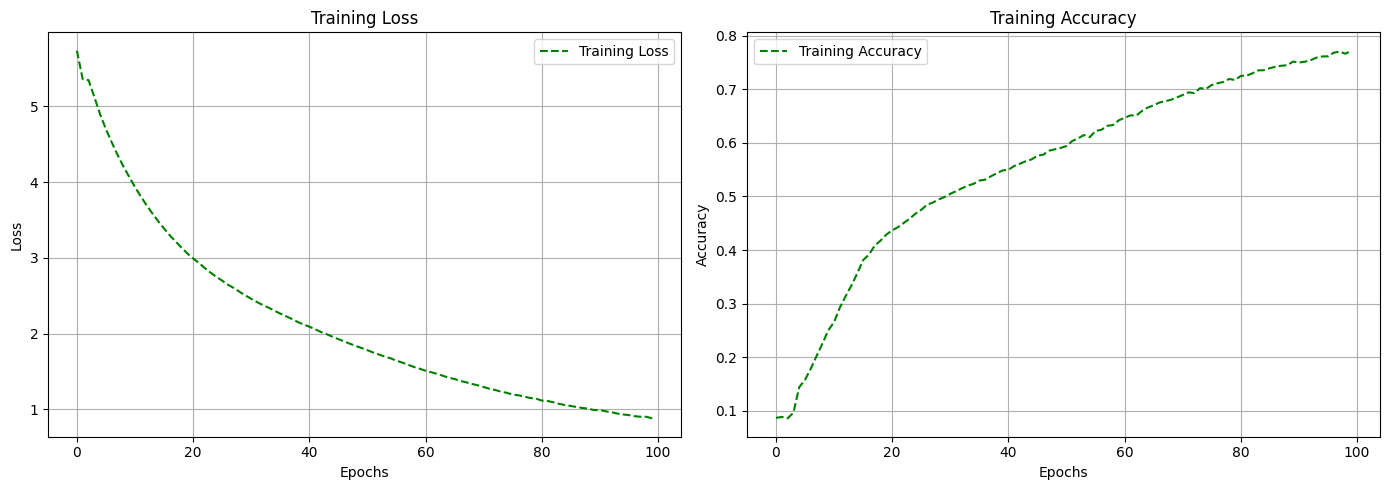

In [ ]:
fig_lstm()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Training loss
    - For the training loss, it starts relatively  and drops steadily
- Training accuracy
    - For the training accuracy, it increases steadily before reaching a train accuacy of 80+ percent
</div>

#### Analysing the results

In [ ]:
pd.Series(results_lstm)

Model Name           sequential
Epochs                      100
Batch Size                  128
Train Loss              0.88115
Train Acc              0.771633
BLEU-Score             0.116524
Rouge-Score            0.423438
Creativity Index       0.727427
Lexical Diversity      0.961305
Cosine Similarity      0.555464
dtype: object

### LSTM Model 2
This is to try out a different kind of model

**Input Type**
- **Configuration**: Length of text

**Embedding**
- **Purpose**: Embedding is a string of numbers that serves as a unique identifier

**LSTM Layers (3 layers)**
- **Layer Type**: LSTM ues 150 neurons

**Dense Layer (1 layer)
- **Layer Type**: To input half of the total words

**Output Block:**

- **Layer Type**: Dense with (total words) neurons and activation ReLU

**Compilation**
- Optimizer: 'adam'.
- Loss Function: Categorical Crossentropy.
- Metrics: Accuracy

In [ ]:
def lstm_model2(input_length, embedding_dim=240, lstm_units=150, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()

    model.add(Embedding(total_words, embedding_dim, input_shape=(input_length,)))

    model.add((LSTM(lstm_units, return_sequences=True)))
    model.add(Dropout(dropout_rate))

    model.add(LSTM(lstm_units, return_sequences=True))
    model.add(Dropout(dropout_rate))

    model.add(LSTM(lstm_units))
    model.add(Dropout(dropout_rate))

    model.add(Dense(total_words / 2, activation='relu'))  
    model.add(Dense(total_words, activation='softmax'))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [ ]:
lstm2_model = lstm_model2(max_sequence_len-1)
lstm2_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 240)           287760    
                                                                 
 lstm (LSTM)                 (None, 34, 150)           234600    
                                                                 
 dropout (Dropout)           (None, 34, 150)           0         
                                                                 
 lstm_1 (LSTM)               (None, 34, 150)           180600    
                                                                 
 dropout_1 (Dropout)         (None, 34, 150)           0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dropout_2 (Dropout)         (None, 150)               0

#### Running the Model

In [ ]:
results_lstm2, fig_lstm2 = evaluator.model_evaluate( x, y , lstm2_model, base_hparams)

Epoch 1/100
86/86 [==============================] - 4s 20ms/step - loss: 5.6217 - accuracy: 0.0820 - lr: 0.0010
Epoch 2/100
86/86 [==============================] - 2s 19ms/step - loss: 5.3290 - accuracy: 0.0860 - lr: 0.0010
Epoch 3/100
86/86 [==============================] - 2s 19ms/step - loss: 5.0358 - accuracy: 0.1115 - lr: 0.0010
Epoch 4/100
86/86 [==============================] - 2s 19ms/step - loss: 4.6900 - accuracy: 0.1507 - lr: 0.0010
Epoch 5/100
86/86 [==============================] - 2s 19ms/step - loss: 4.3464 - accuracy: 0.1799 - lr: 0.0010
Epoch 6/100
86/86 [==============================] - 2s 19ms/step - loss: 4.0045 - accuracy: 0.2183 - lr: 0.0010
Epoch 7/100
86/86 [==============================] - 2s 19ms/step - loss: 3.7278 - accuracy: 0.2594 - lr: 0.0010
Epoch 8/100
86/86 [==============================] - 2s 19ms/step - loss: 3.4863 - accuracy: 0.2948 - lr: 0.0010
Epoch 9/100
86/86 [==============================] - 2s 19ms/step - loss: 3.2749 - accuracy: 0.3

#### Analysing the graph

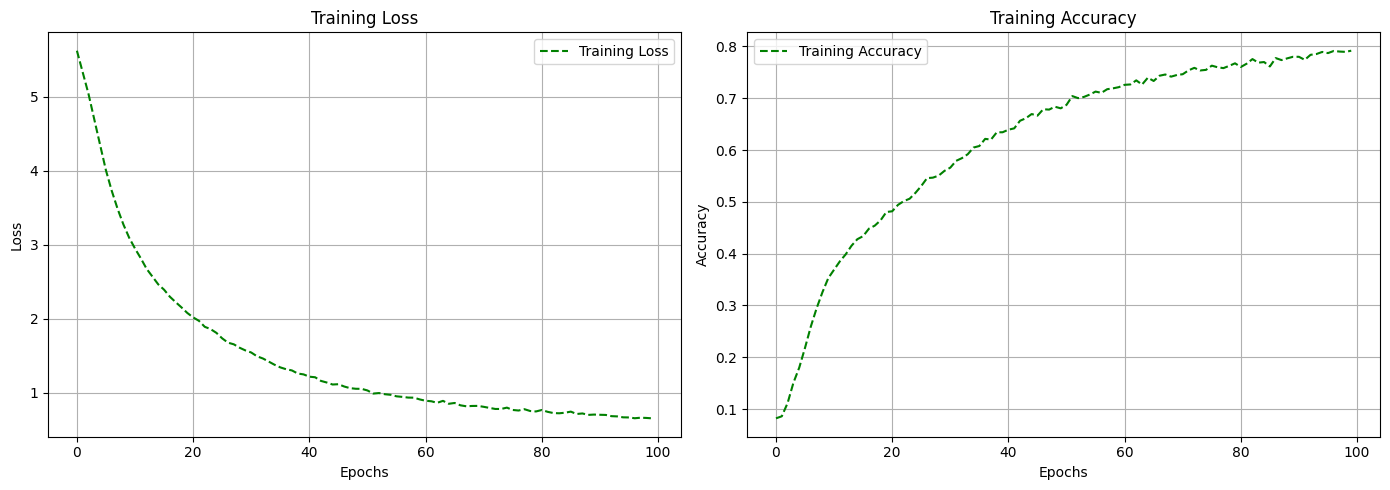

In [ ]:
fig_lstm2()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Training loss
    - For the training loss, it starts relatively  and drops steadily
- Training accuracy
    - For the training accuracy, it increases steadily before reaching a train accuacy of 71+ percent
</div>

#### Analysing the Result

In [ ]:
pd.Series(results_lstm2)

Model Name           sequential
Epochs                      100
Batch Size                  128
Train Loss             0.656629
Train Acc              0.791843
BLEU-Score             0.121713
Rouge-Score            0.429219
Creativity Index       0.721703
Lexical Diversity      0.958855
Cosine Similarity         0.541
dtype: object

### GRU Model (Gated recurrent unit)

- Aims to solve the vanishing gradient problem of a standard RNN
- Uses update gate and research gate
- Trained to keep infomation from long ago, and not waste it through time

**Update Gate**
- Helps the model to determine how much of the past information (from previous time steps) needs to be passed along to the future

**Research Gate**
- Decide how much of the past information to forget

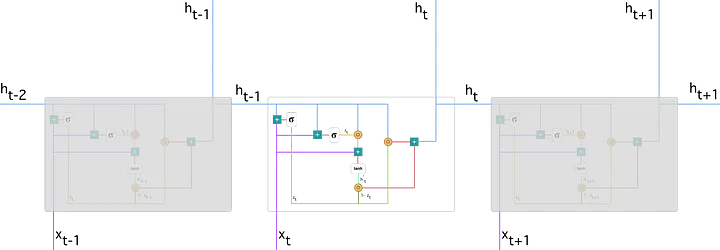

In [ ]:
from tensorflow.keras.layers import Embedding, GRU

def gru_model(input_length, embedding_dim=100, gru_units=128):
    model = Sequential()
    model.add(Embedding(input_dim=total_words, output_dim=embedding_dim, input_length=input_length))
    model.add(GRU(units=gru_units, return_sequences=True))
    model.add(GRU(units=gru_units))
    model.add(Dense(units=total_words, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#### Running the Model

In [ ]:
gru_model = gru_model(max_sequence_len-1)
gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 100)           119900    
                                                                 
 gru (GRU)                   (None, 34, 128)           88320     
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dense (Dense)               (None, 1199)              154671    
                                                                 
Total params: 461,963
Trainable params: 461,963
Non-trainable params: 0
_________________________________________________________________


#### Analysing the Results

In [ ]:
results_gru, fig_gru = evaluator.model_evaluate( x, y , gru_model, base_hparams)

Epoch 1/100
86/86 [==============================] - 3s 12ms/step - loss: 5.7499 - accuracy: 0.0826 - lr: 0.0010
Epoch 2/100
86/86 [==============================] - 1s 10ms/step - loss: 5.3595 - accuracy: 0.0904 - lr: 0.0010
Epoch 3/100
86/86 [==============================] - 1s 10ms/step - loss: 5.3491 - accuracy: 0.0881 - lr: 0.0010
Epoch 4/100
86/86 [==============================] - 1s 10ms/step - loss: 5.3030 - accuracy: 0.1054 - lr: 0.0010
Epoch 5/100
86/86 [==============================] - 1s 11ms/step - loss: 5.0894 - accuracy: 0.1537 - lr: 0.0010
Epoch 6/100
86/86 [==============================] - 1s 11ms/step - loss: 4.8867 - accuracy: 0.1646 - lr: 0.0010
Epoch 7/100
86/86 [==============================] - 1s 10ms/step - loss: 4.6790 - accuracy: 0.1753 - lr: 0.0010
Epoch 8/100
86/86 [==============================] - 1s 11ms/step - loss: 4.5051 - accuracy: 0.1817 - lr: 0.0010
Epoch 9/100
86/86 [==============================] - 1s 10ms/step - loss: 4.3305 - accuracy: 0.2

#### Analyse the Graph

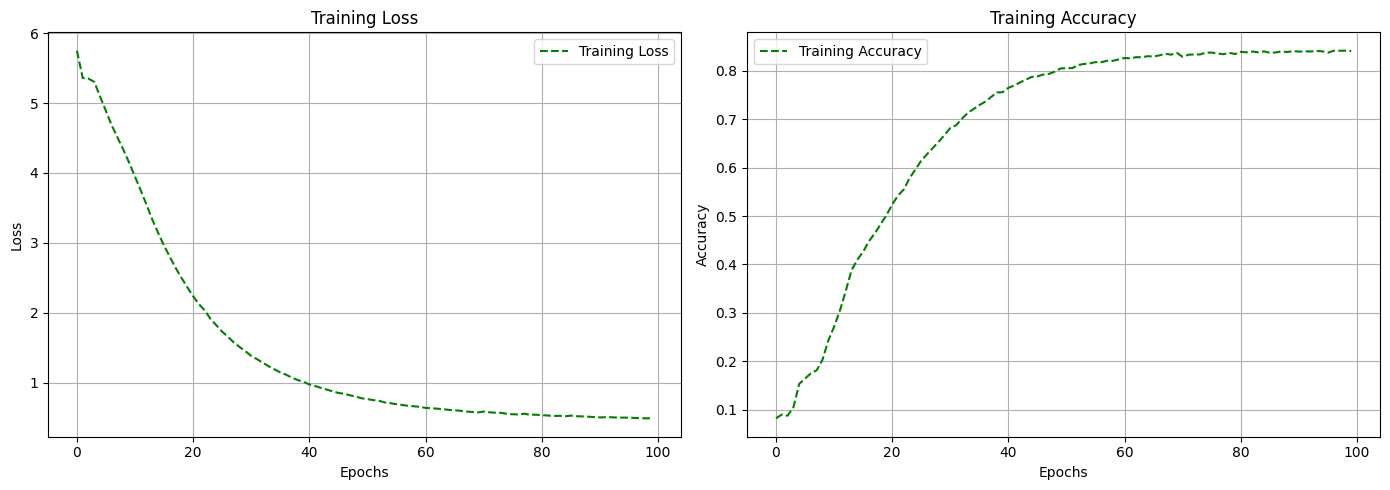

In [ ]:
fig_gru()

#### Analyse the Results

In [ ]:
pd.Series(results_gru)

Model Name           sequential
Epochs                      100
Batch Size                  128
Train Loss             0.489599
Train Acc               0.84108
BLEU-Score             0.121713
Rouge-Score            0.451263
Creativity Index       0.702778
Lexical Diversity      0.900939
Cosine Similarity      0.515426
dtype: object

#### Bidirectional Model

In [ ]:
def bidirectional_model(max_sequence_length):
    model = Sequential()
    model.add(Embedding(total_words, 100, input_length=max_sequence_length))
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dropout(0.2))
    model.add(Dense(total_words, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

bidirectional_model = bidirectional_model(max_sequence_len-1)
bidirectional_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 100)           119900    
                                                                 
 bidirectional (Bidirectiona  (None, 34, 256)          234496    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 34, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1199)              1

#### Running the Model

In [ ]:
results_bid, fig_bid = evaluator.model_evaluate( x, y , bidirectional_model, base_hparams)

Epoch 1/100
86/86 [==============================] - 5s 20ms/step - loss: 5.7331 - accuracy: 0.0839 - lr: 0.0010
Epoch 2/100
86/86 [==============================] - 1s 17ms/step - loss: 5.2461 - accuracy: 0.0923 - lr: 0.0010
Epoch 3/100
86/86 [==============================] - 1s 12ms/step - loss: 5.0002 - accuracy: 0.0911 - lr: 0.0010
Epoch 4/100
86/86 [==============================] - 1s 12ms/step - loss: 4.8646 - accuracy: 0.1052 - lr: 0.0010
Epoch 5/100
86/86 [==============================] - 1s 12ms/step - loss: 4.7450 - accuracy: 0.1339 - lr: 0.0010
Epoch 6/100
86/86 [==============================] - 1s 12ms/step - loss: 4.6134 - accuracy: 0.1548 - lr: 0.0010
Epoch 7/100
86/86 [==============================] - 1s 13ms/step - loss: 4.4788 - accuracy: 0.1693 - lr: 0.0010
Epoch 8/100
86/86 [==============================] - 1s 12ms/step - loss: 4.3538 - accuracy: 0.1823 - lr: 0.0010
Epoch 9/100
86/86 [==============================] - 1s 13ms/step - loss: 4.2243 - accuracy: 0.2

#### Analyse the Graph

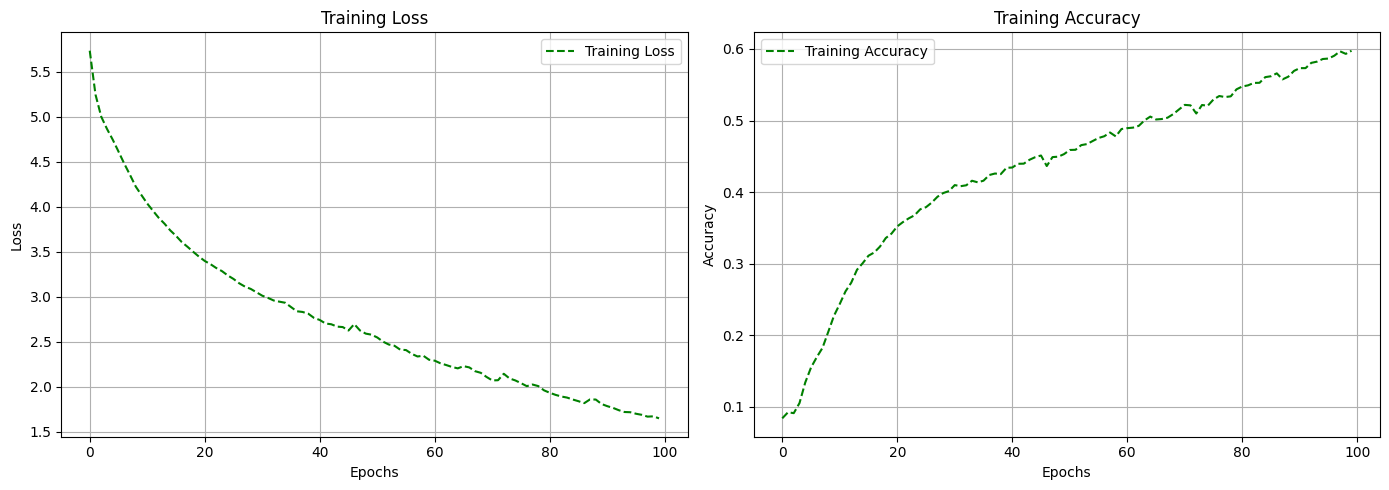

In [ ]:
fig_bid()

#### Analyse the Result

In [ ]:
pd.Series(results_bid)

Model Name           sequential
Epochs                      100
Batch Size                  128
Train Loss             1.650299
Train Acc              0.597556
BLEU-Score             0.121713
Rouge-Score            0.446014
Creativity Index       0.706976
Lexical Diversity       0.91728
Cosine Similarity      0.597689
dtype: object

### Combined Models

In [ ]:
def combined(max_sequence_length):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(Bidirectional(LSTM(units=lstm_units, return_sequences=True)))
    model.add(Bidirectional(GRU(units=gru_units, return_sequences=False)))
    model.add(Dense(units=dense_units, activation='relu'))
    model.add(Dense(units=output_units, activation='softmax'))  # or another activation function depending on the task

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Feature Engineering (2)__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to do data preprocessing

### Sentiment Analyser

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
def sentiment_analyser(quote):
    return sia.polarity_scores(quote)

df['Sentiment'] = df['Quotes'].apply(sentiment_analyser)
df['Sentiment']

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ruizh\AppData\Roaming\nltk_data...


0      {'neg': 0.0, 'neu': 0.413, 'pos': 0.587, 'comp...
1      {'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'comp...
2      {'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...
3      {'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compou...
4      {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...
                             ...                        
995    {'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'comp...
996    {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...
997    {'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'comp...
998    {'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'comp...
999    {'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'comp...
Name: Sentiment, Length: 1000, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Quotes'])
X_tfidf

<1000x1179 sparse matrix of type '<class 'numpy.float64'>'
	with 10961 stored elements in Compressed Sparse Row format>

### Replacement With Synonym (Data Augmentation)

- A form of data augmentation
- Creates and generates words that are similar in meaning to the qutoes

In [ ]:
import random
from nltk.corpus import wordnet

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().replace('_', ' '))
    return list(synonyms)

def replace_sym(sentence, n):
    words = sentence.split()
    for i in range(n):
        word_to_replace = random.choice(words)
        synonyms = get_synonyms(word_to_replace)
        if synonyms:
            synonym = random.choice(synonyms)
            words = [synonym if word == word_to_replace else word for word in words]
    return ' '.join(words)



#### Example usage

In [ ]:
new_sentence = replace_sym(df['Quotes'][0], 2)
new_sentence

"Embrace the beauty of every sunrise; it's a fresh chance to pigment your world with joy."

#### Edit the DataFrame

In [ ]:
fraction_to_augment = 0.3  # e.g., 30% of the dataset
number_of_replacements = 2  # e.g., replace two words per sentence

augmented_texts = []
for line in df['Quotes'].sample(frac=fraction_to_augment):
    augmented_line = replace_sym(line, number_of_replacements)
    augmented_texts.append(augmented_line)

augmented_df_30 = pd.DataFrame(augmented_texts, columns=['Quotes'])
augmented_df_30

,Quotes
0,embracing the power of positive affirmations; ...
1,"This morning, let your laugh be the melody tha..."
2,"Every act of benignity holds the potential, th..."
3,"Dance through the chapters of growth, and let ..."
4,From Labrador nature Reserve's rugged charm to...
...,...
295,Every leaf that falls is a reminder of the cyc...
296,"Radiate love, for it is the dead on target exp..."
297,"radial peace, and create a sanctuary of sereni..."
298,Life's book is written with the ink of our sen...


#### Combine with dataframe (other 70 percent)

In [ ]:
df_aug = pd.concat([df, augmented_df_30]).reset_index(drop=True)
df_aug['Quotes']

0       Embrace the beauty of every sunrise; it's a fr...
1       Embrace challenges; they are the stepping ston...
2       Embrace the rhythm of life and let it dance th...
3       Embrace kindness, for it has the power to chan...
4       Embrace the journey, for it leads to the desti...
                              ...                        
1295    Every leaf that falls is a reminder of the cyc...
1296    Radiate love, for it is the dead on target exp...
1297    radial peace, and create a sanctuary of sereni...
1298    Life's book is written with the ink of our sen...
1299     weigh in yourself, and watch your dreams unfold.
Name: Quotes, Length: 1300, dtype: object

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_aug['Quotes'])
total_words_aug = len(tokenizer.word_index) + 1

input_sequences_aug = []
for line in df_aug['Quotes']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences_aug.append(n_gram_sequence)

In [ ]:
#### Creating the max sequence length

In [ ]:
max_sequence_len = max([len(x) for x in input_sequences_aug])
input_sequences_aug = np.array(pad_sequences(input_sequences_aug, maxlen=max_sequence_len, padding='pre'))
input_sequences_aug.shape

(14215, 35)

In [ ]:
x_aug, y_aug = input_sequences_aug[:,:-1],input_sequences_aug[:,-1]
y_aug = tf.keras.utils.to_categorical(y_aug, num_classes=total_words_aug)
y_aug

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
def bidirectional_model(max_sequence_length):
    model = Sequential()
    model.add(Embedding(total_words_aug, 100, input_length=max_sequence_length))
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dropout(0.2))
    model.add(Dense(total_words_aug, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

bidirectional_model = bidirectional_model(max_sequence_len-1)
bidirectional_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 100)           136100    
                                                                 
 bidirectional (Bidirectiona  (None, 34, 256)          234496    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 34, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1361)              1

In [ ]:
results_bid_aug, fig_bid_aug = evaluator.model_evaluate( x_aug, y_aug , bidirectional_model, base_hparams)

Epoch 1/100
112/112 [==============================] - 5s 15ms/step - loss: 5.7149 - accuracy: 0.0830 - lr: 0.0010
Epoch 2/100
112/112 [==============================] - 1s 12ms/step - loss: 5.1726 - accuracy: 0.1100 - lr: 0.0010
Epoch 3/100
112/112 [==============================] - 1s 13ms/step - loss: 4.8606 - accuracy: 0.1429 - lr: 0.0010
Epoch 4/100
112/112 [==============================] - 1s 12ms/step - loss: 4.6444 - accuracy: 0.1686 - lr: 0.0010
Epoch 5/100
112/112 [==============================] - 1s 12ms/step - loss: 4.4698 - accuracy: 0.1890 - lr: 0.0010
Epoch 6/100
112/112 [==============================] - 1s 13ms/step - loss: 4.3093 - accuracy: 0.2166 - lr: 0.0010
Epoch 7/100
112/112 [==============================] - 2s 17ms/step - loss: 4.1717 - accuracy: 0.2393 - lr: 0.0010
Epoch 8/100
112/112 [==============================] - 2s 17ms/step - loss: 4.0579 - accuracy: 0.2547 - lr: 0.0010
Epoch 9/100
112/112 [==============================] - 2s 17ms/step - loss: 3.99

In [ ]:
results_bid_aug

{'Model Name': 'sequential',
 'Epochs': 100,
 'Batch Size': 128,
 'Train Loss': 1.1598011255264282,
 'Train Acc': 0.7035526037216187,
 'BLEU-Score': 0.12000565808565415,
 'Rouge-Score': 0.4398985681107733,
 'Creativity Index': 0.7137404262404263,
 'Lexical Diversity': 0.9275778388278388,
 'Cosine Similarity': 0.5616513669490815}

In [ ]:
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequences = pad_sequences(input_sequences_aug)
predictions = bidirectional_model.predict(padded_sequences)
def calculate_perplexity(predictions, true_labels):
    n = len(true_labels)
    cross_entropy_loss = -1/n * sum([math.log2(p[x]) for p, x in zip(predictions, true_labels)])
    return math.pow(2, cross_entropy_loss)
y_aug_indices = np.argmax(y_aug, axis=1)
perplexity = calculate_perplexity(predictions, y_aug_indices)
print(f"Perplexity: {perplexity}")

445/445 [==============================] - 4s 7ms/step
Perplexity: 4038086.075861401


<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Model Improvement - Add Regularisation__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to do model improvement

In [ ]:
def baseline_model_lr(input_length, total_words):
    model = Sequential()
    model.add(Flatten(input_shape=(input_length,)))
    model.add(Dense(512, activation='relu', kernel_regularizer = (l2(0.0001))))
    model.add(Dropout(0.5))
    
    model.add(Dense(units=512, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    
    model.add(Dense(units=total_words, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
baseline_lr = baseline_model_lr(max_sequence_len - 1, total_words)
baseline_lr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 34)                0         
                                                                 
 dense (Dense)               (None, 512)               17920     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1199)              615087    
                                                                 
Total params: 895,663
Trainable params: 895,663
Non-trai

In [ ]:
custom_metric_callback = CustomMetric(seed_texts=seed_texts,
                                      target_texts=None,  # Not required for generation
                                      model=baseline_lr,
                                      tokenizer=tokenizer,
                                      max_len=max_sequence_len)

In [ ]:
results_bid_aug, fig_bid_aug = evaluator.model_evaluate( x, y , baseline_lr, base_hparams, callbacks=[custom_metric_callback])

Epoch 1/100
82/86 [===========================>..] - ETA: 0s - loss: 16.1728 - accuracy: 0.0318  
Epoch 1 - Mean Cosine Similarity: 0.38778337836265564
86/86 [==============================] - 5s 58ms/step - loss: 15.8719 - accuracy: 0.0327
Epoch 2/100
81/86 [===========================>..] - ETA: 0s - loss: 7.5726 - accuracy: 0.0630
Epoch 2 - Mean Cosine Similarity: 0.4123939871788025
86/86 [==============================] - 5s 57ms/step - loss: 7.5682 - accuracy: 0.0628
Epoch 3/100
69/86 [=======================>......] - ETA: 0s - loss: 7.3941 - accuracy: 0.0781
Epoch 3 - Mean Cosine Similarity: 0.4204636514186859
86/86 [==============================] - 5s 64ms/step - loss: 7.3945 - accuracy: 0.0780
Epoch 4/100
71/86 [=======================>......] - ETA: 0s - loss: 7.2930 - accuracy: 0.0821
Epoch 4 - Mean Cosine Similarity: 0.39250996708869934
86/86 [==============================] - 5s 58ms/step - loss: 7.2692 - accuracy: 0.0814
Epoch 5/100
77/86 [=========================>....]

In [ ]:
y_aug.shape

(14215, 1361)

In [ ]:
predictions.shape

(14215, 1361)

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Model Improvement - Advanced Model__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is try out advacned model 

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Hyperparameter Tuning__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to hyperparamter tune

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Final Testing__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to final test the model

In [ ]:
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = TFGPT2LMHeadModel.from_pretrained("gpt2")

input_ids = tokenizer.encode('Seed text here', return_tensors='tf')

generated_text_samples = model.generate(input_ids, max_length=50, num_return_sequences=5)
for generated_text in generated_text_samples:
    print(tokenizer.decode(generated_text, skip_special_tokens=True))

vocab.json: 100%|██████████| 1.04M/1.04M [00:00<00:00, 7.09MB/s]
merges.txt: 100%|██████████| 456k/456k [00:00<00:00, 8.03MB/s]
tokenizer.json: 100%|██████████| 1.36M/1.36M [00:00<00:00, 11.1MB/s]
config.json: 100%|██████████| 665/665 [00:00<00:00, 133kB/s]
model.safetensors: 100%|██████████| 548M/548M [00:51<00:00, 10.7MB/s] 
All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


ValueError: Greedy methods without beam search do not support `num_return_sequences` different than 1 (got 5).

In [ ]:
import nltk
import random
import numpy as np
from nltk.corpus import wordnet

# Ensure the appropriate NLTK models and corpora are downloaded
nltk.download('averaged_perceptron_tagger')
def synonym_replacement(sentence, num_replacements=1):
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if wordnet.synsets(word)]))
    random.shuffle(random_word_list)

    num_replaced = 0
    for random_word in random_word_list:
        synonyms = set()
        for syn in wordnet.synsets(random_word):
            for lemma in syn.lemmas():
                synonyms.add(lemma.name())
        if len(synonyms) >= 1:
            synonym = random.choice(list(synonyms))
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= num_replacements:
            break

    sentence = ' '.join(new_words)
    return sentence

def random_insertion(sentence, num_insertions=1):
    words = sentence.split()
    for _ in range(num_insertions):
        new_synonym = get_synonyms(random.choice(words))
        if new_synonym:
            index = random.randint(0, len(words))
            words.insert(index, new_synonym)
    return ' '.join(words)

def random_deletion(sentence, probability=0.2):
    words = sentence.split()
    if len(words) == 1:
        return sentence
    remaining = list(filter(lambda x: random.uniform(0, 1) > probability, words))
    if len(remaining) == 0:
        return random.choice(words)
    return ' '.join(remaining)

def random_swap(sentence, num_swaps=1):
    words = sentence.split()
    length = len(words)
    for _ in range(num_swaps):
        index1 = random.randint(0, length - 1)
        index2 = index1
        while index2 == index1:
            index2 = random.randint(0, length - 1)
        words[index1], words[index2] = words[index2], words[index1]
    return ' '.join(words)

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    if len(synonyms) > 0:
        return random.choice(list(synonyms))
    else:
        return None

# Example usage
sentence = "This is an example sentence for augmentation."

augmented_sentence_syn = synonym_replacement(sentence)
augmented_sentence_ins = random_insertion(sentence)
augmented_sentence_del = random_deletion(sentence)
augmented_sentence_swap = random_swap(sentence)

print("Original:", sentence)
print("Synonym Replacement:", augmented_sentence_syn)
print("Random Insertion:", augmented_sentence_ins)
print("Random Deletion:", augmented_sentence_del)
print("Random Swap:", augmented_sentence_swap)


In [ ]:
!mkdir nltk_data

In [ ]:
nltk.download("wordnet", "nltk_data/")

In [ ]:
!pip install rouge_score

In [ ]:
import nltk
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu

# Ensure the appropriate NLTK models are downloaded
nltk.download('punkt')

def evaluate_bleu(reference_texts, generated_text):
    """
    Evaluates the BLEU score for the generated text against reference texts.
    """
    reference_tokens = [nltk.word_tokenize(ref.lower()) for ref in reference_texts]
    generated_tokens = nltk.word_tokenize(generated_text.lower())
    return sentence_bleu(reference_tokens, generated_tokens)

def evaluate_rouge(reference_texts, generated_text):
    """
    Evaluates the ROUGE score (ROUGE-L) for the generated text against reference texts.
    """
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    scores = [scorer.score(ref, generated_text)['rougeL'].fmeasure for ref in reference_texts]
    return sum(scores) / len(scores)

# Example usage
reference_texts = seed_texts[6]
generated_text = predict_next_word(bidirectional_model, reference_texts)
print(generated_text)
bleu_score = evaluate_bleu(reference_texts, generated_text)
rouge_score = evaluate_rouge(reference_texts, generated_text)

print(f"BLEU Score: {bleu_score}")
print(f"ROUGE Score: {rouge_score}")

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer('all-MiniLM-L6-v2')

sentence_embeddings = model.encode([reference_texts, generated_text])
similarity = cosine_similarity(
    [sentence_embeddings[0]],
    [sentence_embeddings[1]]
)[0][0]
similarity

In [ ]:
def augment_quote(row):
    choice = random.choice([synonym_replacement, random_insertion, random_deletion, random_swap])
    return choice(row['Quotes'])

df['augmented_quote'] = df.apply(augment_quote, axis=1)

In [ ]:
def predict_next_word(model, seed_text, num_to_predict=10, temperature=0.5):
    for _ in range(num_to_predict):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        
        predicted_probs = model.predict(token_list, verbose=0)[0]
        preds = np.asarray(predicted_probs).astype('float64')
        preds = np.log(preds + 1e-8) / temperature  
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        probabilities = np.random.multinomial(1, preds, 1)
        predicted_index = np.argmax(probabilities)
        output_word = tokenizer.index_word[predicted_index]
        seed_text += " " + output_word
    return seed_text
